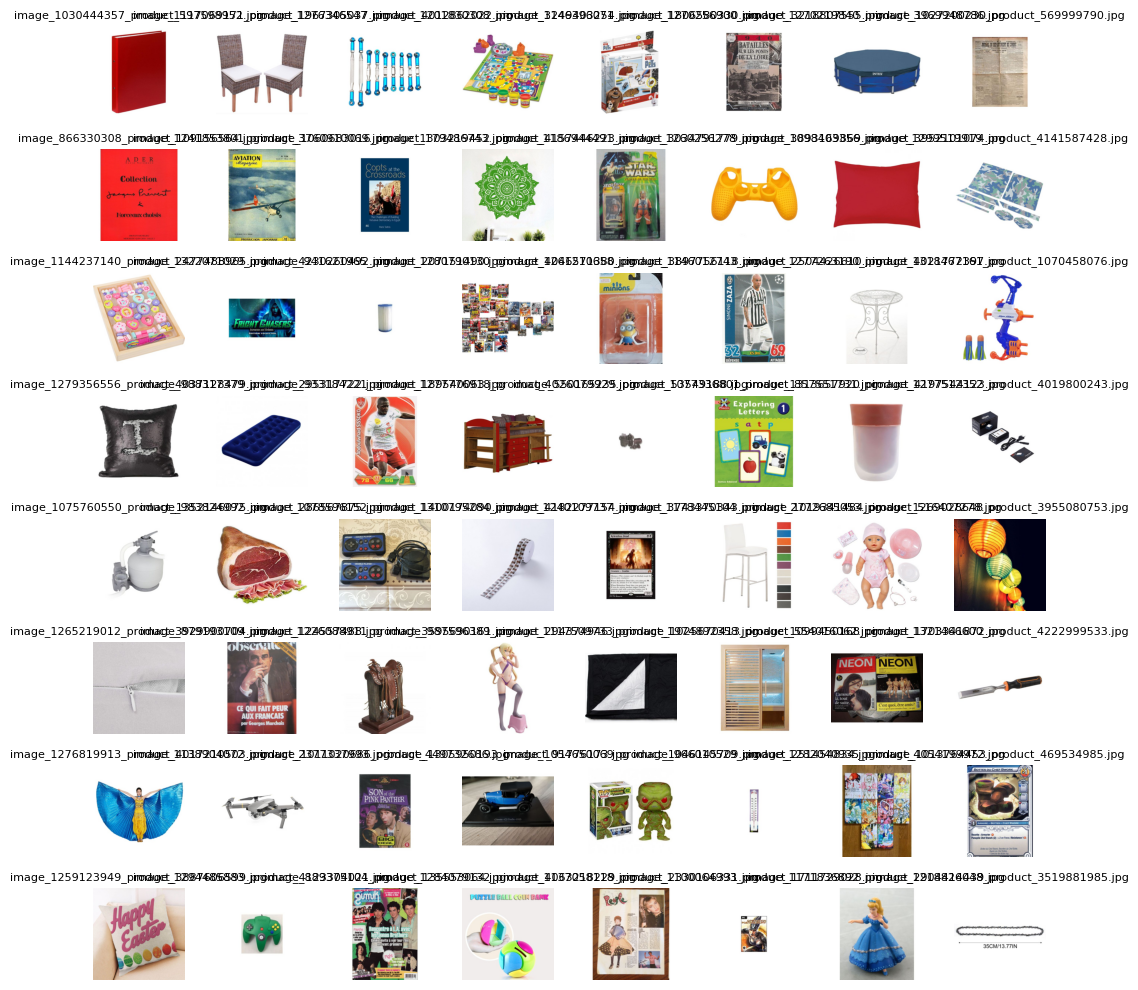

In [8]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define the folder containing the images
image_folder = '/Users/robertwilson/Downloads/images/image_train'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

# Randomly select a subset of images
num_images = 64  # Number of images to display
selected_images = random.sample(image_files, min(num_images, len(image_files)))

# Set up the grid dimensions
grid_size = int(num_images**0.5)  # Assuming a square grid

# Create a figure for the grid
fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

# Loop through the selected images and display them
for i, ax in enumerate(axes.flat):
    if i < len(selected_images):
        img_path = os.path.join(image_folder, selected_images[i])
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(selected_images[i], fontsize=8)
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide unused grid cells

# Adjust layout and show the grid
plt.tight_layout()
plt.show()

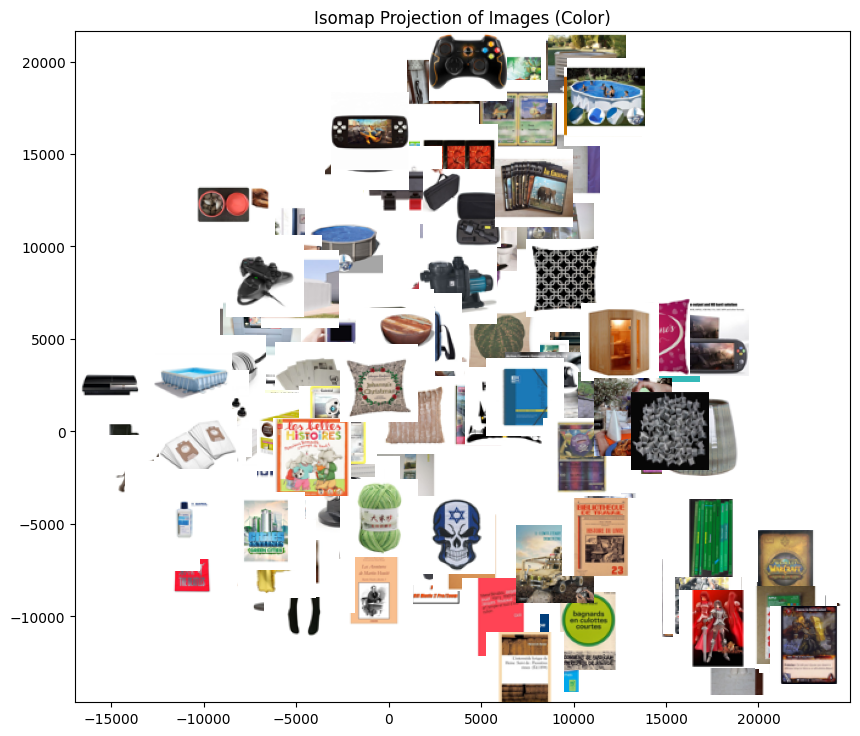

In [7]:
from sklearn.manifold import Isomap
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the folder containing the images
image_folder = '/Users/robertwilson/Downloads/images/image_train'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

# Randomly select a subset of 50 images
num_images = 200  # Number of images to select
selected_images = random.sample(image_files, min(num_images, len(image_files)))

# Load and preprocess the images into feature vectors
image_vectors = []
images = []
for img_file in selected_images:
    img_path = os.path.join(image_folder, img_file)
    img = Image.open(img_path).resize((64, 64))  # Resize to 64x64 while keeping color
    img_array = np.array(img).flatten()  # Flatten into a 1D array
    image_vectors.append(img_array)
    images.append(np.array(img))  # Keep the resized image for visualization

# Stack feature vectors into a 2D array
image_vectors = np.array(image_vectors)

# Apply Isomap for dimensionality reduction
isomap = Isomap(n_components=2)
image_2d = isomap.fit_transform(image_vectors)

# Function to plot images on a scatterplot
def plot_components(data, images, ax=None, thumb_frac=0.1):
    ax = ax or plt.gca()
    ax.scatter(data[:, 0], data[:, 1], alpha=0)  # Invisible scatter to set limits
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    for i, (x, y) in enumerate(data):
        img = images[i]
        img_height, img_width, _ = img.shape  # Get dimensions for color images
        thumb_size = thumb_frac * (x_max - x_min)
        img_extent = [x - thumb_size / 2, x + thumb_size / 2,
                      y - thumb_size / 2, y + thumb_size / 2]
        ax.imshow(img, extent=img_extent, origin='upper')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Plot the 2D Isomap projection with images
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_2d, images, ax=ax, thumb_frac=0.1)
plt.title("Isomap Projection of Images (Color)")
plt.show()